In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction import xrd
from matplotlib import *

In [2]:
mp_key = "8ChDIqwByRyXhuV8q0dfcUVnIxLTB4o7"
mp_id = "mp-961649"

In [3]:
with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)
print(structure)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Full Formula (Zr1 Fe1 Te1)
Reduced Formula: ZrFeTe
abc   :   4.329555   4.329555   4.329555
angles:  60.000000  60.000000  60.000000
pbc   :       True       True       True
Sites (3)
  #  SP       a     b     c    magmom
---  ----  ----  ----  ----  --------
  0  Zr    0.5   0.5   0.5         -0
  1  Fe    0.25  0.25  0.25         0
  2  Te    0     0     0           -0


## Calcul des 3 premiers pics du diffractrogramme 

In [4]:
lambda_onde = 1.54060

XRay        = xrd.XRDCalculator(wavelength=lambda_onde,symprec=0, debye_waller_factors=None)
diffractogramme = XRay.get_pattern(structure,scaled=True,two_theta_range=(0,90))

#on récupère les angles , indices de Miller et intensités de notre diffractogramme
hkl         = diffractogramme.hkls
angles      = diffractogramme.x
intensites  = diffractogramme.y

## Diffractrogramme pour ZrFeTe

3 premiers pics du diffractogramme pour ZrFeTe avce un rayonnement X incident Cu Kα (λ = 1.54060 Å)
 Pic 1- 

 Angle : 2θ   = 25.171733709171814
 Intensite         = 15.311852744781296
 Indices de Miller = (1, 1, 1) de multiplicité 2

 _____________________

 Pic 2- 

 Angle : 2θ   = 29.14586174231283
 Intensite         = 43.66790850655674
 Indices de Miller = (1, 1, 0) de multiplicité 6

 _____________________

 Pic 3- 

 Angle : 2θ   = 41.68904826763445
 Intensite         = 100.0
 Indices de Miller = (2, 1, 1) de multiplicité 6

 _____________________



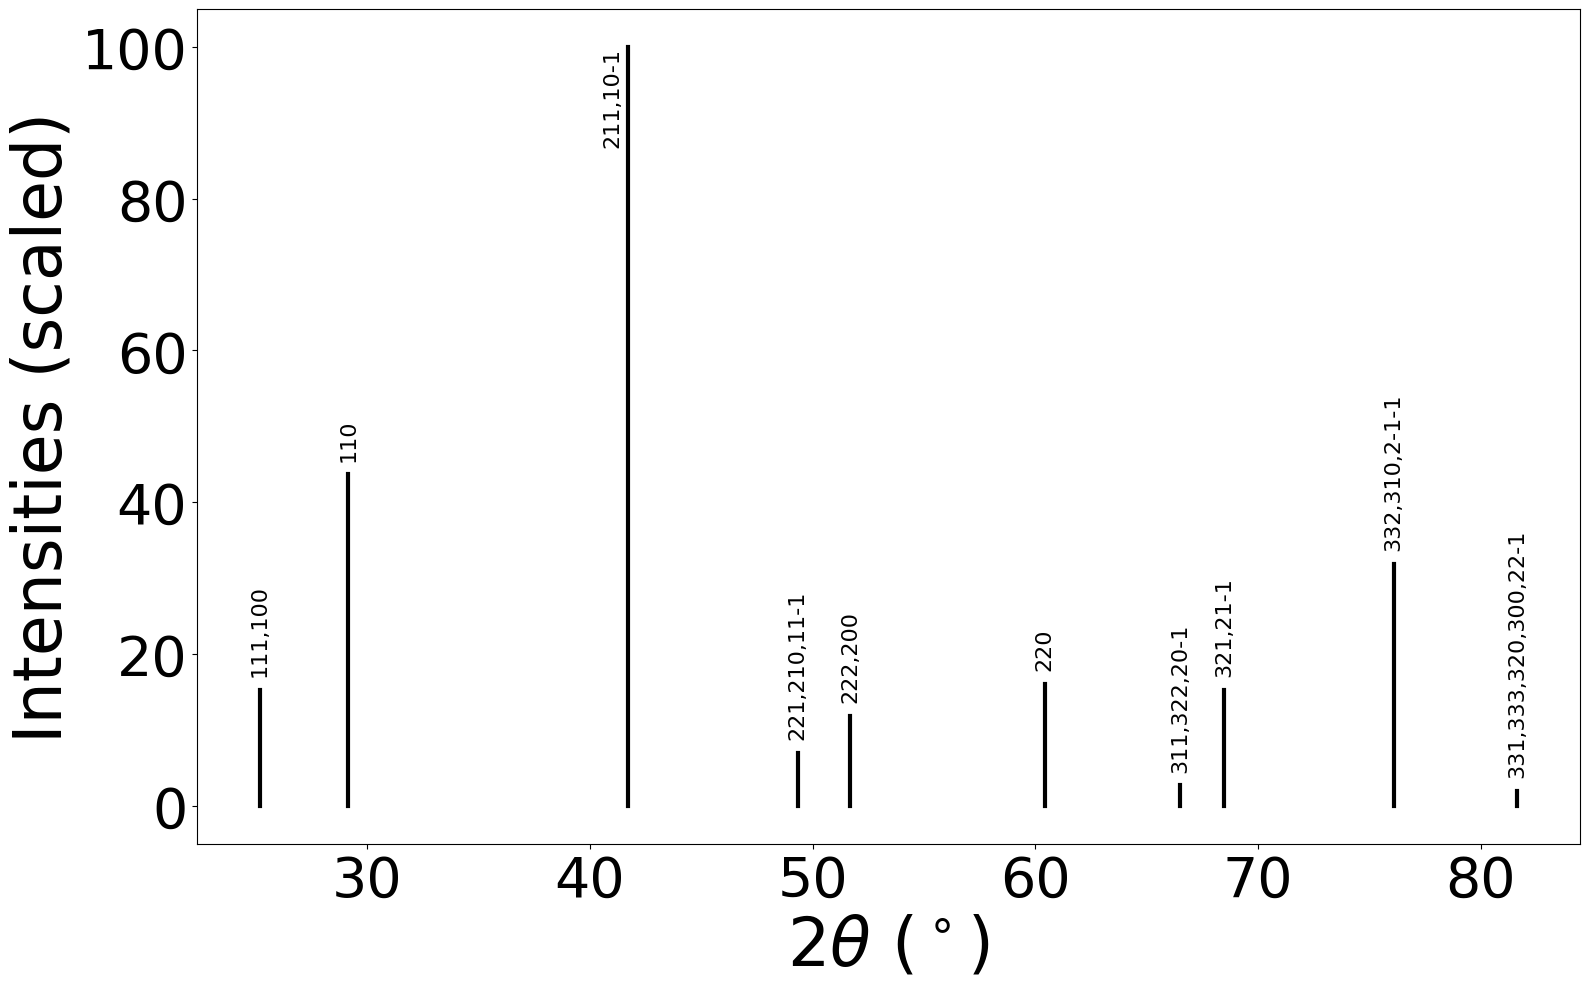

In [5]:
print("3 premiers pics du diffractogramme pour ZrFeTe avce un rayonnement X incident Cu Kα (\u03BB = 1.54060 \u212B)") 
for i in range(3):
    #pour chaque pic analysé on récupère les données relativees à celui-ci
    print(" Pic "+str(i+1)+"- \n")
    print(" Angle : 2\u03B8   = " + str(angles[i]))
    print(" Intensite         = " + str(intensites[i]))
    print(" Indices de Miller = " + str(hkl[i][0]['hkl'])+ " de multiplicité "+ str(hkl[i][0].get("multiplicity"))+ "\n")
    print(" _____________________\n")

plot = XRay.get_plot(structure,two_theta_range = (0,90), annotate_peaks = 'compact',ax=None,with_labels = True , fontsize = 16)
